In [1]:
import random
import boolean2pew as b2p
from PEW_functions import *
from matplotlib import pyplot as plt
def general_async_pick( lines ):
    line = [ random.choice( lines )]
    return line
import seaborn as sns

In [2]:
import ensemble_simulation as esim
import cupy
cupy.random.seed(0)
import numpy 
numpy.random.seed(0)

In [3]:
#this depends on cupy if it doesn't work set this variable to "booleannet"
simulation_method = 'cubewalkers'

In [4]:
ensemble_size=5000
steps=2000

In [5]:
model_name = 'HH_EMT'
with open(model_name + '.booleannet','r') as f:
    rules = f.read()
print(rules)


SNAI1 *= (not miR_34 and not SNAI1) or GLI
miR_34 *= not SNAI1 and not ZEB1
ZEB1 *= (SNAI1 and SNAI2 and TWIST1 and LEF1 and B_catenin_TCF4 and GLI) or not miR_200
miR_200 *= not (ZEB1 and SNAI1)
SNAI2 *= TWIST1 or B_catenin_nuc or GLI
LEF1 *= ((B_catenin_nuc and (not miR_34))) or NFKB
TWIST1 *= SNAI1 and (not miR_34 or NFKB)
B_catenin_nuc *= ((not miR_34) or (not miR_200)) and (not AJ)
B_catenin_TCF4 *= B_catenin_nuc and SNAI1 and SNAI2
E_cadherin *= not (ZEB1 and SNAI1 and SNAI2 and TWIST1)
TGFb_secr *= (B_catenin_TCF4 or GLI) and (not miR_200) 
GLI*= not SUFU
SHH*= (GLI or NFKB) and not HHIP
HHIP*= GLI
Patched*= not SHH
SMO*= not Patched
SUFU *= not SMO
NFKB*= Damage
AJ *= E_cadherin and neighbor
Rac1 *= not miR_34 or not miR_200
PAK1 *= Rac1
Migration *= PAK1 and not E_cadherin
Damage *= Damage 
neighbor *= neighbor



In [6]:
experiments_dict={}

<Axes: xlabel='Steps', ylabel='Average node value'>

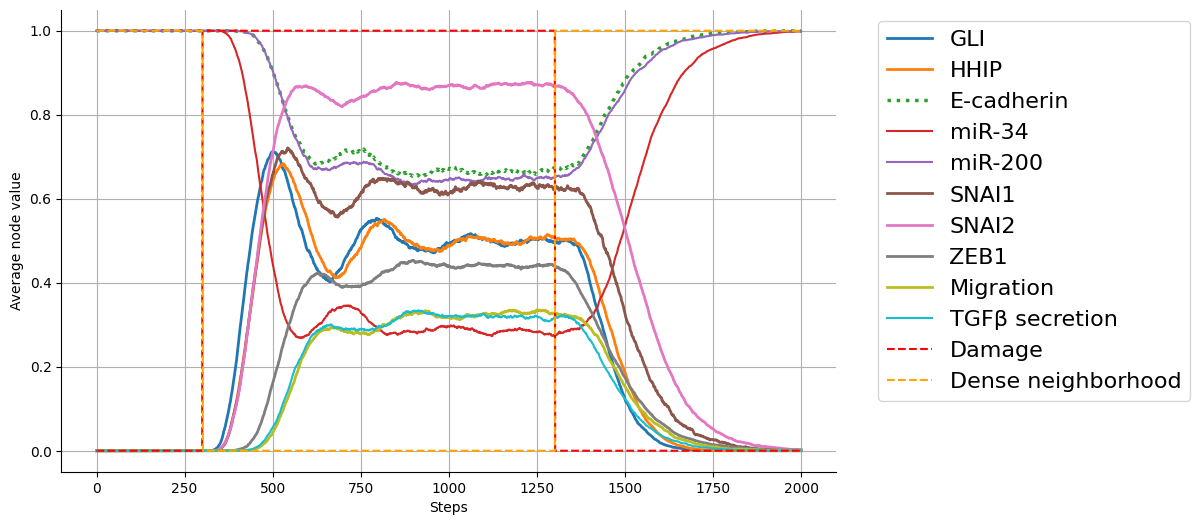

In [7]:
#Epithelial

model = b2p.Model(rules, mode='async')

initial_state={ 'E_cadherin': 1,
 'GLI': 0,
 'HHIP': 0,
 'LEF1': 0,
 'NFKB': 0,
 'B_catenin_nuc': 0,
 'Patched': 1,
 'Damage': 0,
 'SHH': 0,
 'SNAI1': 0,
 'SNAI2': 0,
 'SUFU': 1,
 'SMO':0,             
 'TGFb_secr': 0,
 'TWIST1': 0,
 'ZEB1': 0,
 'B_catenin_TCF4': 0,
 'miR_200': 1,
 'miR_34': 1,
 'AJ':1,
'neighbor':1,
'Rac1':0,
'PAK1':0,
'Migration':0}
model.initialize(lambda node: initial_state[node])
import ensemble_simulation as esim

update_mode='async'
shuffler=general_async_pick
  
node_order=list(initial_state.keys())
break_states=[]


c_avg_dict={}

manipulation_set=[{'node':'Damage','enforced_state':1, 'start_time':300, 'end_time':1300,'success_probability':1},
                 {'node':'Damage','enforced_state':0, 'start_time':1300, 'end_time':steps,'success_probability':1},
                 {'node':'neighbor','enforced_state':0, 'start_time':301, 'end_time':1300,'success_probability':1},
                 {'node':'neighbor','enforced_state':1, 'start_time':1301, 'end_time':steps,'success_probability':1}
]

es=esim.ensemble_simulation(rules,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps, shuffler=shuffler)
es.simulate_manipulated_ensemble(manipulation_set,simulation_method)
experiments_dict['hybrid E/M wt']=es
experiments_dict['wt_default']=es
monitored_nodes = ['GLI','HHIP','E_cadherin','miR_34','miR_200','SNAI1','SNAI2','ZEB1','Migration','TGFb_secr','Damage','neighbor']

line_props = {'Damage':{'color':'red', 'linestyle':'--', 'label':'Damage'},
              'neighbor':{'color':'orange', 'linestyle':'--', 'label':'Dense neighborhood'},
              'miR_34':{'label':'miR-34'},
              'miR_200':{'label':'miR-200'},
             'E_cadherin':{'label':'E-cadherin', 'linestyle':'dotted','linewidth':2.5},
             'TGFb_secr':{'label':'TGFβ secretion'}}

experiments_dict['hybrid E/M wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props)


<Axes: xlabel='Steps', ylabel='Average node value'>

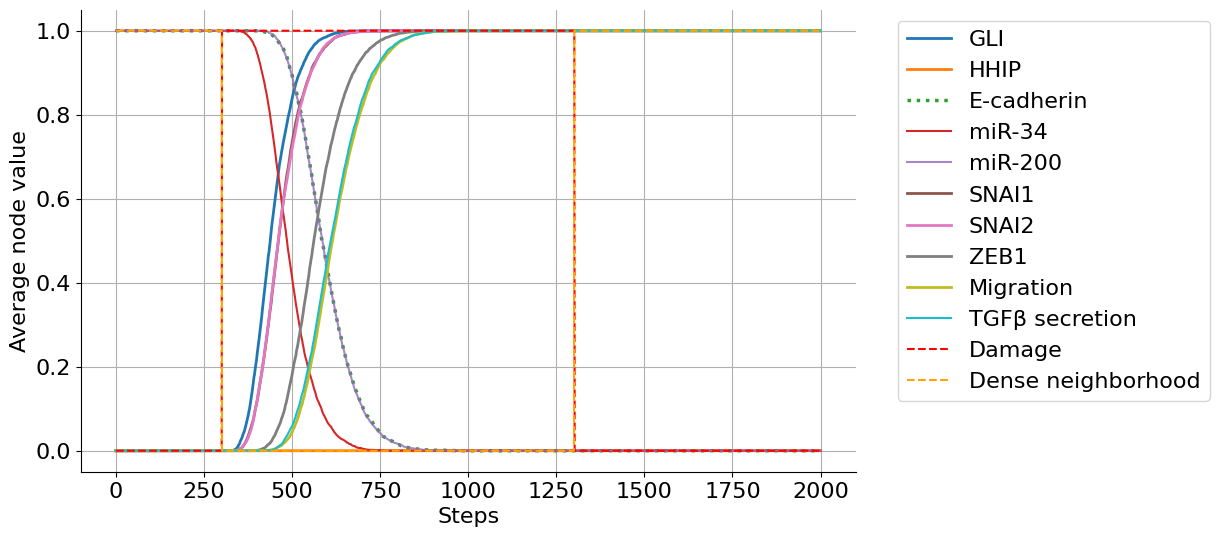

In [8]:
#Mesenchymal WT state

model = b2p.Model(rules, mode='async')

initial_state={ 'E_cadherin': 1,
 'GLI': 0,
 'HHIP': 0,
 'LEF1': 0,
 'NFKB': 0,
 'B_catenin_nuc': 0,
 'Patched': 1,
 'Damage': 0,
 'SHH': 0,
 'SNAI1': 0,
 'SNAI2': 0,
 'SUFU': 1,
 'SMO':0,             
 'TGFb_secr': 0,
 'TWIST1': 0,
 'ZEB1': 0,
 'B_catenin_TCF4': 0,
 'miR_200': 1,
 'miR_34': 1,
 'AJ':1,
'neighbor':1,
'Rac1':0,
'PAK1':0,
'Migration':0}

model.initialize(lambda node: initial_state[node])
import ensemble_simulation as esim

update_mode='async'
shuffler=general_async_pick
  
node_order=list(initial_state.keys())
break_states=[]

c_avg_dict={}

manipulation_set=[{'node':'HHIP','enforced_state':0, 'start_time':0, 'end_time':steps,'success_probability':1},
                 {'node':'Damage','enforced_state':1, 'start_time':300, 'end_time':1300,'success_probability':1},
                 {'node':'Damage','enforced_state':0, 'start_time':1300, 'end_time':steps,'success_probability':1},
                 {'node':'neighbor','enforced_state':0, 'start_time':300, 'end_time':1300,'success_probability':1},
                 {'node':'neighbor','enforced_state':1, 'start_time':1300, 'end_time':steps,'success_probability':1}]

es=esim.ensemble_simulation(rules,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps, shuffler=shuffler)
es.simulate_manipulated_ensemble(manipulation_set,simulation_method)
experiments_dict['mesenchymal wt']=es

monitored_nodes = ['GLI','HHIP','E_cadherin','miR_34','miR_200','SNAI1','SNAI2','ZEB1','Migration','TGFb_secr','Damage','neighbor']

line_props = {'Damage':{'color':'red', 'linestyle':'--', 'label':'Damage'},
              'neighbor':{'color':'orange', 'linestyle':'--', 'label':'Dense neighborhood'},
              'miR_34':{'label':'miR-34'},
              'miR_200':{'label':'miR-200', 'alpha':0.8},
             'E_cadherin':{'label':'E-cadherin', 'linestyle':'dotted','linewidth':2.5},
              'TGFb_secr':{'label':'TGFβ secretion'}}


experiments_dict['mesenchymal wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props)

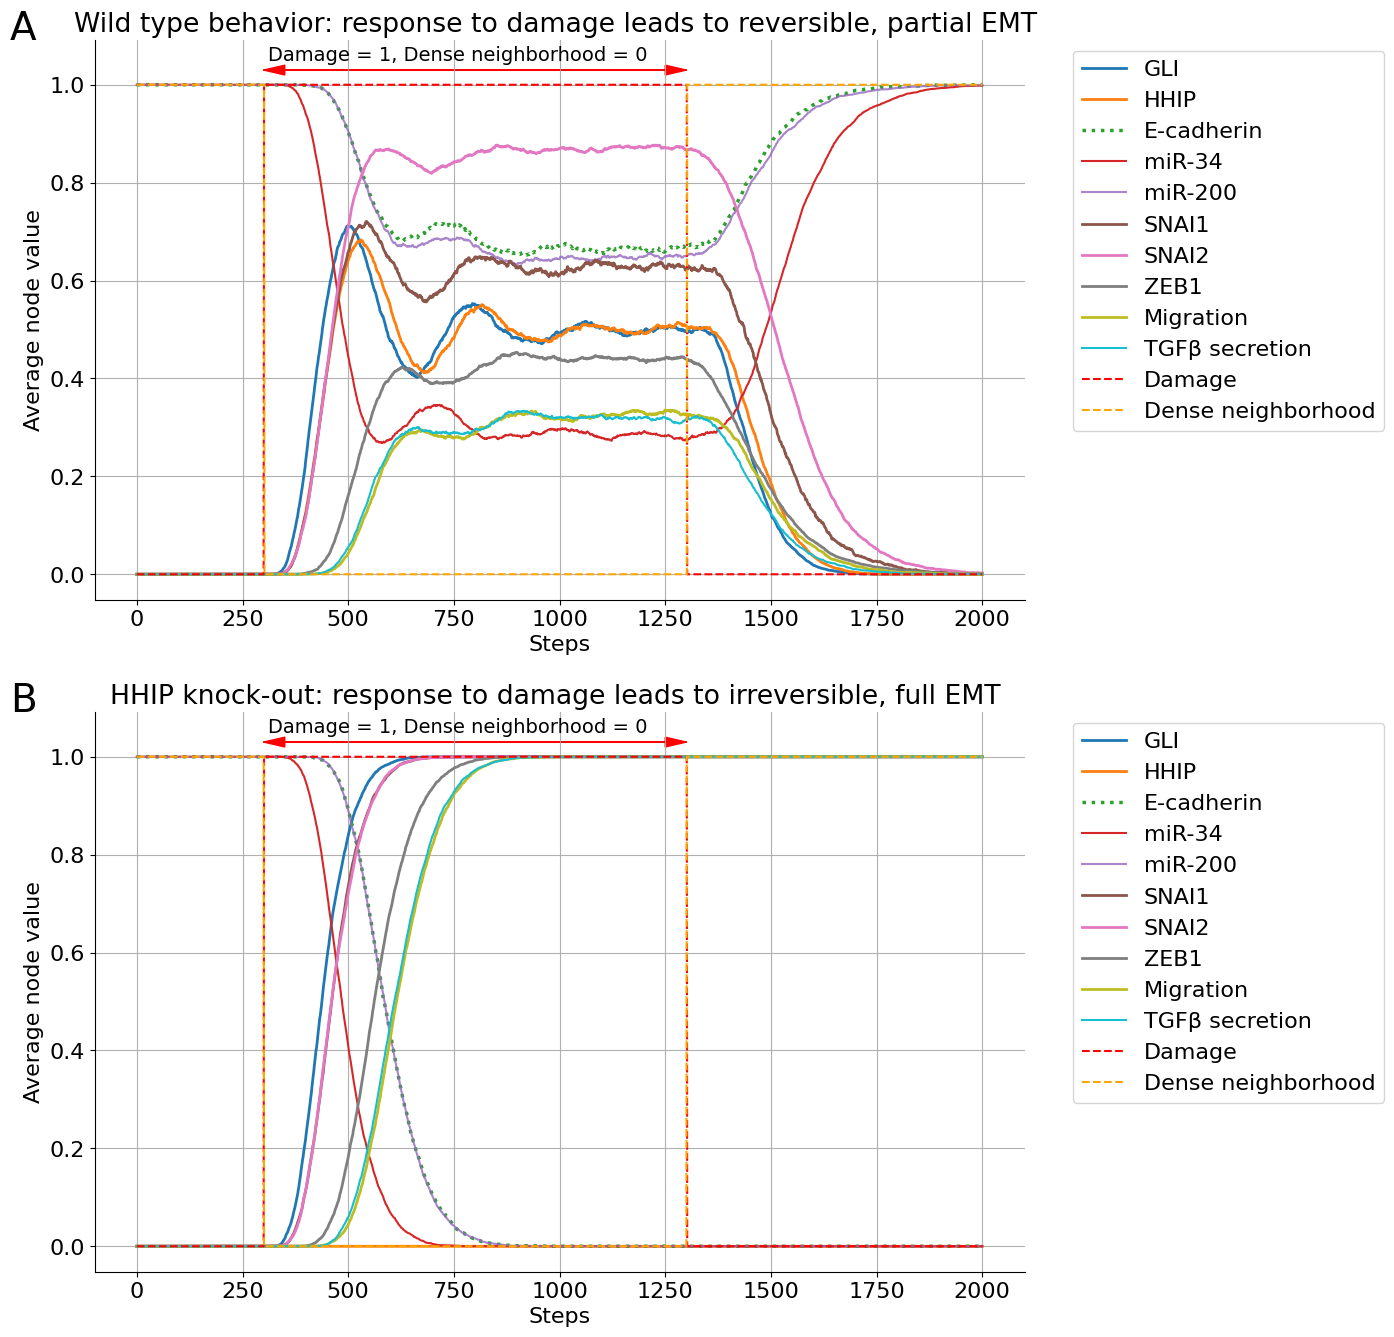

In [15]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize=(12,16))
experiments_dict['hybrid E/M wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax1)
ax1.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 14)
ax1.set_title('Wild type behavior: response to damage leads to reversible, partial EMT ')
ax1.text(ax1.get_xlim()[0]-(steps/10),ax1.get_ylim()[1],'A',fontsize=28)

experiments_dict['mesenchymal wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax2)
ax2.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 14)
ax2.set_title('HHIP knock-out: response to damage leads to irreversible, full EMT ')
ax2.text(ax2.get_xlim()[0]-(steps/10),ax2.get_ylim()[1],'B',fontsize=28)

plt.savefig('figures/Figure2.png', bbox_inches='tight',dpi=300)
plt.savefig('figures/Figure2.tiff',bbox_inches='tight')

In [ ]:
# version 2

In [91]:
import pandas as pd
df_pred_scores=pd.read_excel('prediction_scores.xlsx')

Text(-300.0, 1.092, 'B')

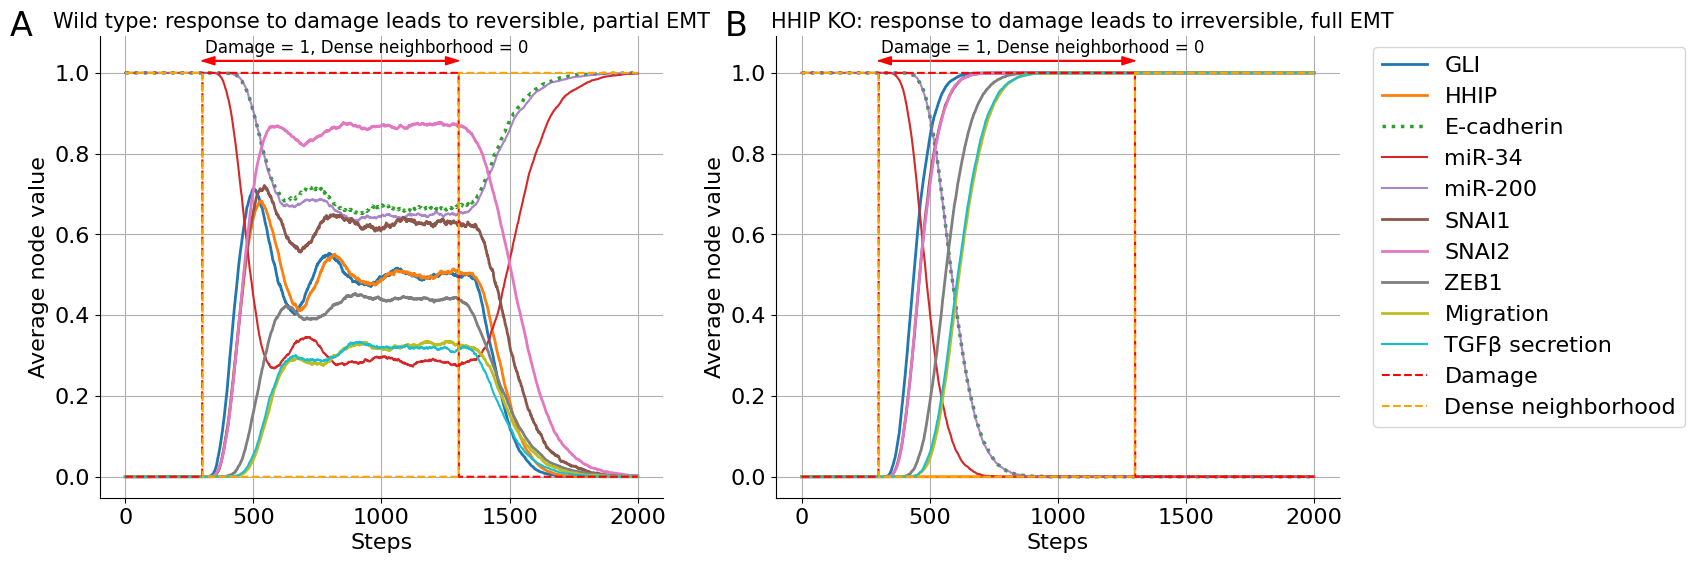

In [92]:

fig, [ax1,ax2] = plt.subplots(1,2, figsize=(16,6), sharex=True)
experiments_dict['hybrid E/M wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax1)
ax1.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax1.set_title('Wild type: response to damage leads to reversible, partial EMT', fontsize = 15)
ax1.get_legend().remove()
ax1.text(ax1.get_xlim()[0]-(steps/10)-150,ax1.get_ylim()[1],'A',fontsize=24)

experiments_dict['mesenchymal wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax2)
ax2.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax2.set_title('HHIP KO: response to damage leads to irreversible, full EMT ',x=0.55, fontsize = 15)
ax2.text(ax2.get_xlim()[0]-(steps/10),ax2.get_ylim()[1],'B',fontsize=24)

#plt.savefig('figures/Figure2.png', bbox_inches='tight',dpi=300)
#plt.savefig('figures/Figure2.tiff',bbox_inches='tight')

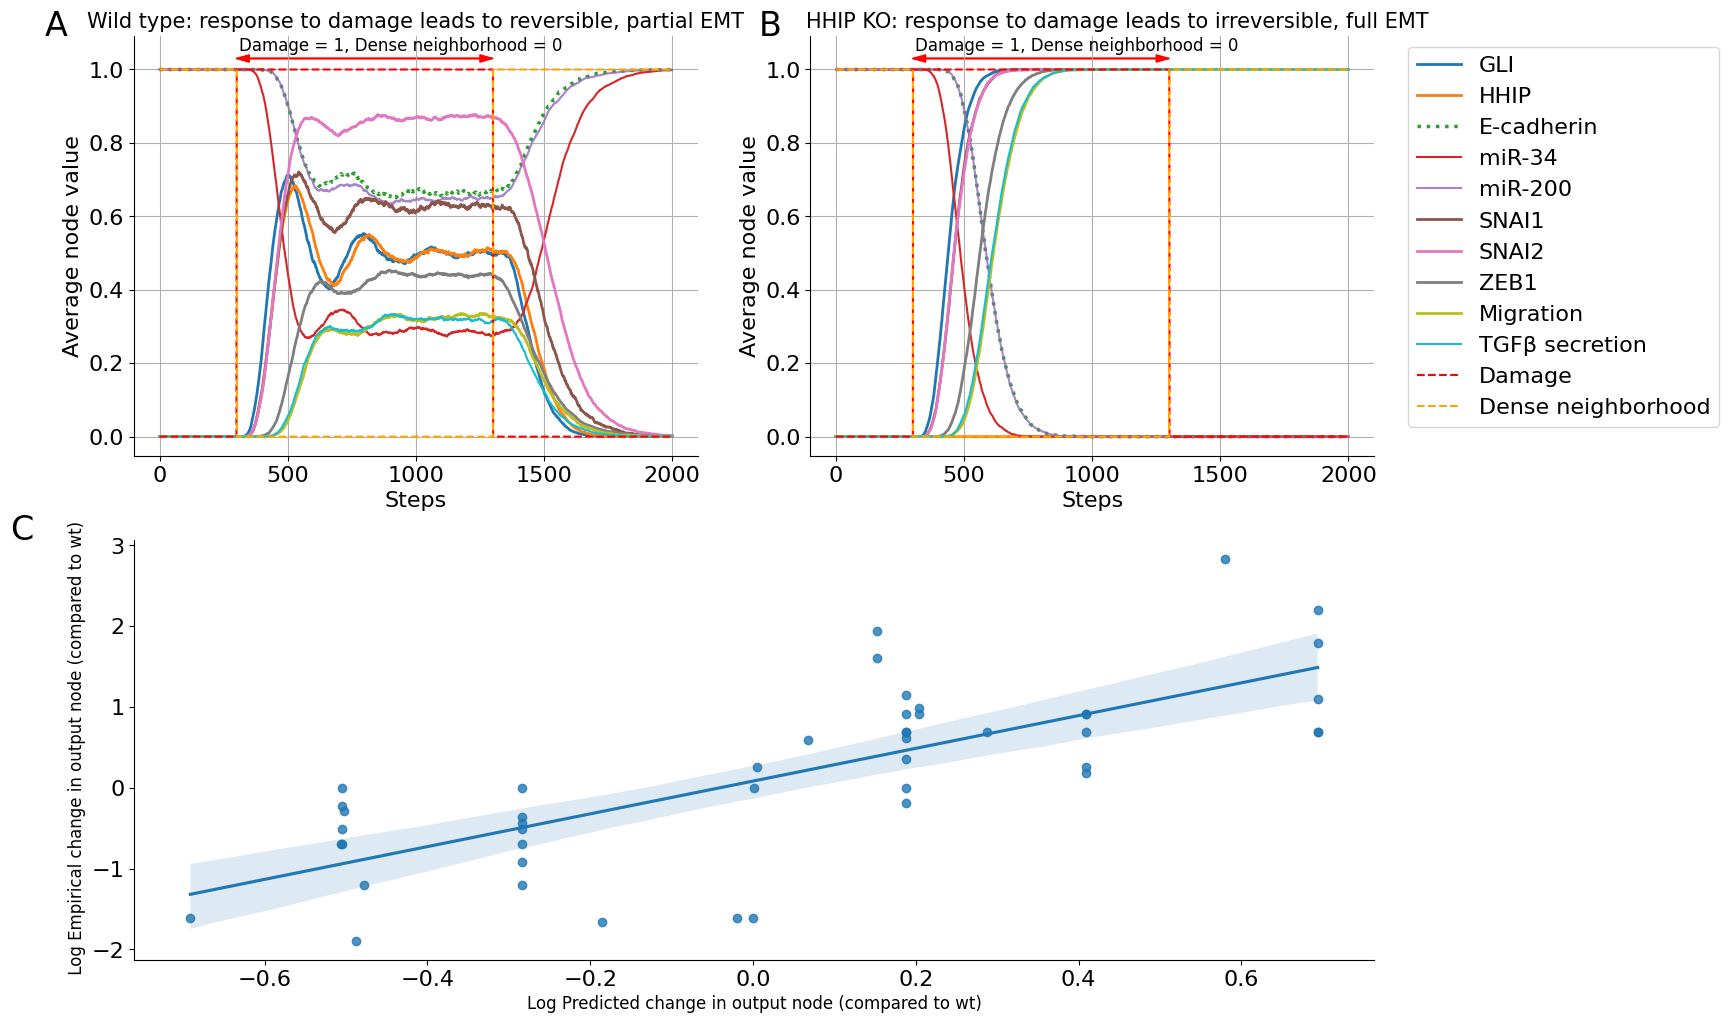

In [93]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(16,12))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
experiments_dict['hybrid E/M wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax1)
ax1.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax1.set_title('Wild type: response to damage leads to reversible, partial EMT', fontsize = 15)
ax1.get_legend().remove()
ax1.text(ax1.get_xlim()[0]-(steps/10)-150,ax1.get_ylim()[1],'A',fontsize=24)

ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
experiments_dict['mesenchymal wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax2)
ax2.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax2.set_title('HHIP KO: response to damage leads to irreversible, full EMT ',x=0.55, fontsize = 15)
ax2.text(ax2.get_xlim()[0]-(steps/10),ax2.get_ylim()[1],'B',fontsize=24)

ax3 = plt.subplot(gs[1,:])
sns.regplot(x='log Predicted degree multiplier',y='log Empirical degree multiplier',data = df_pred_scores)#,scatter_kws={'facecolors':df_pred_scores['color']})
plt.ylabel(' Log Empirical change in output node (compared to wt)',fontsize = 12)
plt.xlabel('Log Predicted change in output node (compared to wt)',fontsize = 12)
ax3.text(ax3.get_xlim()[0]-((ax3.get_xlim()[1]-ax3.get_xlim()[0])/10),ax3.get_ylim()[1],'C',fontsize=24)
sns.despine()

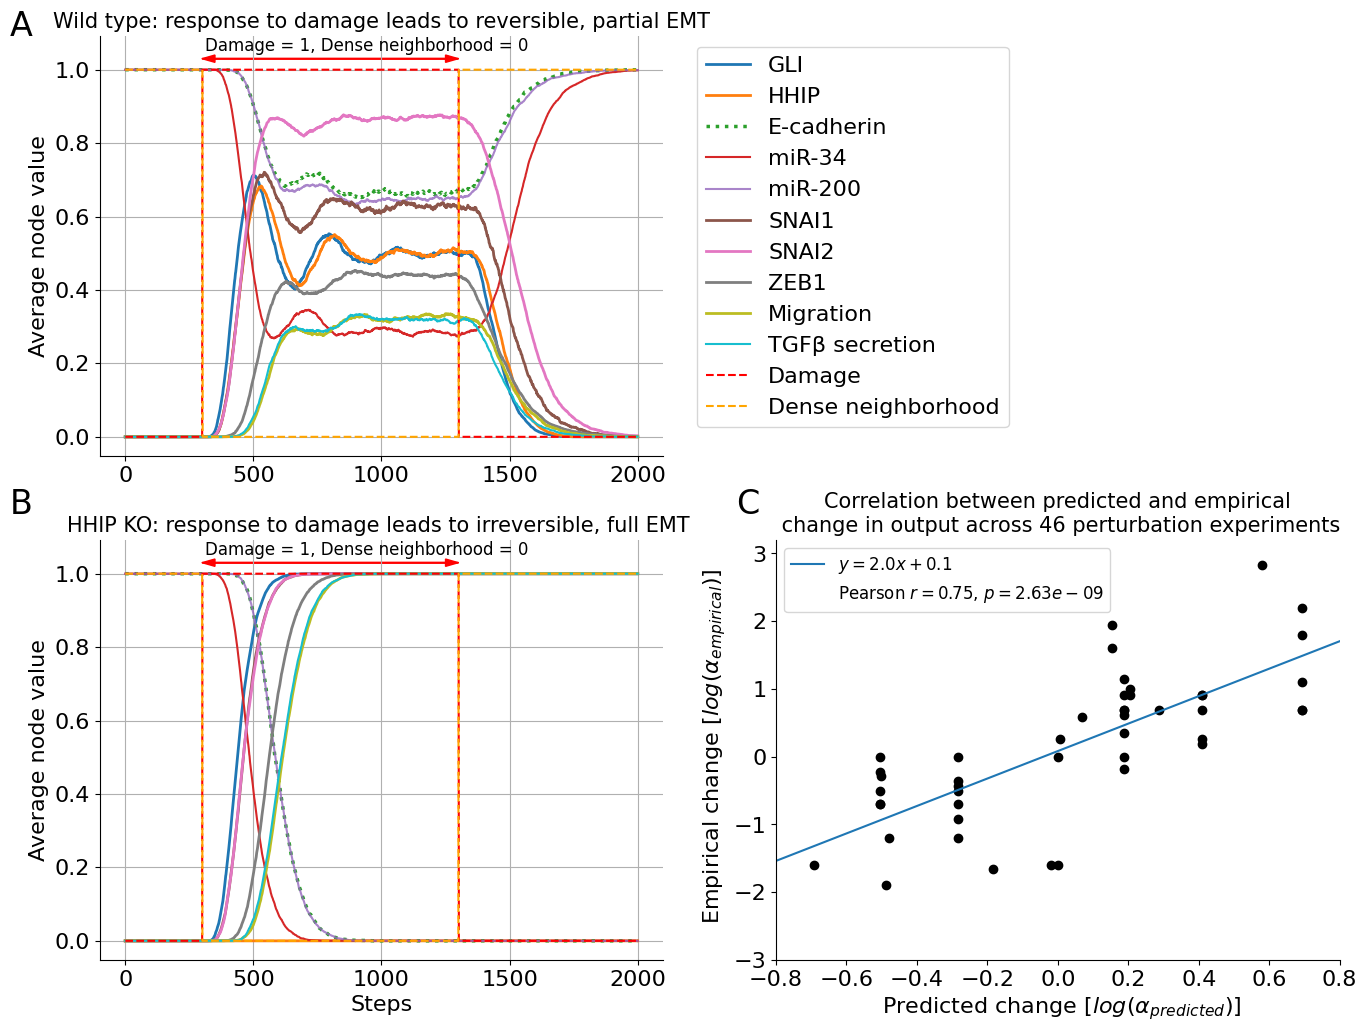

In [172]:
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
#
plt.rcParams['text.usetex'] = False
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(16,12))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
experiments_dict['hybrid E/M wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax1)
ax1.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax1.set_title('Wild type: response to damage leads to reversible, partial EMT', fontsize = 15)
#ax1.get_legend().remove()
ax1.text(ax1.get_xlim()[0]-(steps/10)-150,ax1.get_ylim()[1],'A',fontsize=24)
ax1.set_xlabel('')


ax2 = plt.subplot(gs[1, 0]) # row 0, col 1
experiments_dict['mesenchymal wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax2)
ax2.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax2.set_title('HHIP KO: response to damage leads to irreversible, full EMT ', fontsize = 15)
ax2.text(ax2.get_xlim()[0]-(steps/10)-150,ax2.get_ylim()[1]+0.07,'B',fontsize=24)
ax2.get_legend().remove()

ax3 = plt.subplot(gs[1,1])
ax3.scatter(df_pred_scores['log Predicted degree multiplier'], df_pred_scores['log Empirical degree multiplier'], color = 'black')
ax3.set_ylabel(r' Empirical change [$log (\alpha_{empirical})$]',fontsize = 16)
ax3.set_xlabel(r' Predicted change [$log (\alpha_{predicted})$]',fontsize = 16)
ax3.text(ax3.get_xlim()[0]-((ax3.get_xlim()[1]-ax3.get_xlim()[0])/10),ax3.get_ylim()[1]+(ax3.get_ylim()[1]/6),'C',fontsize=24)
from scipy import stats

m, b, *_ = stats.linregress(df_pred_scores['log Predicted degree multiplier'], df_pred_scores['log Empirical degree multiplier'])
pearsnon_r, p_value = stats.pearsonr(df_pred_scores['log Predicted degree multiplier'], df_pred_scores['log Empirical degree multiplier'])
ax3.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
ax3.plot([], [], ' ', label=r"Pearson $r = {:.2f}$".format(pearsnon_r)+", $p={:.2e}$".format(p_value))
ax3.set_xlim(-0.8, 0.8)
ax3.set_ylim(-3, 3.2)

ax3.legend(fontsize=12)
ax3.set_title('Correlation between predicted and empirical\n change in output across 46 perturbation experiments', fontsize = 15)
sns.despine()
plt.savefig('figures/Figure2.png', bbox_inches='tight',dpi=300)
plt.savefig('figures/Figure2.pdf',bbox_inches='tight')

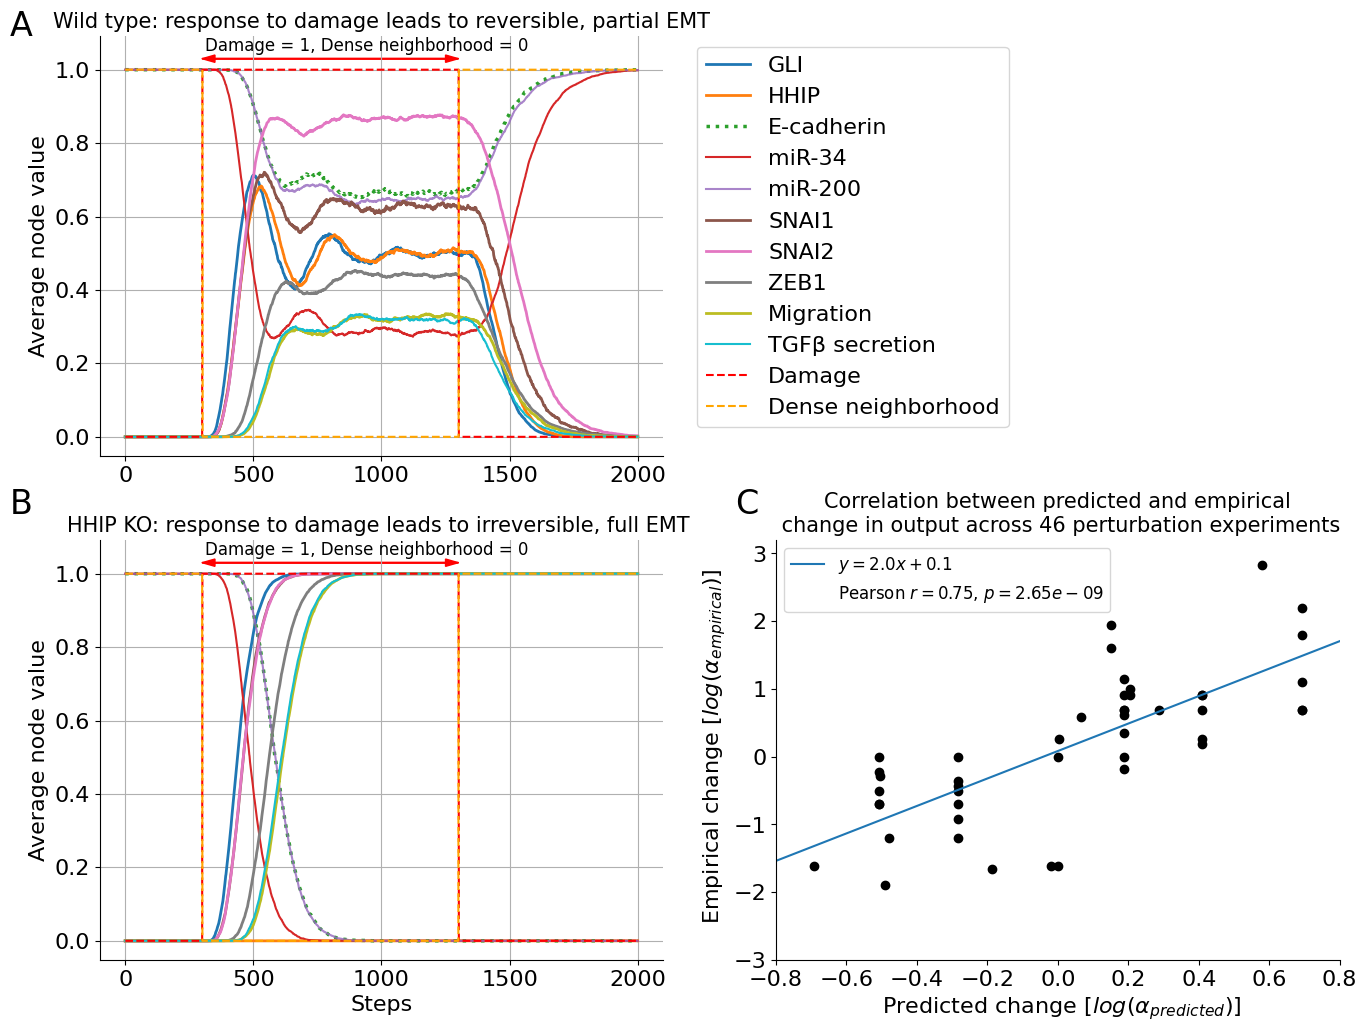

In [177]:
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
#
plt.rcParams['text.usetex'] = False
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(16,12))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
experiments_dict['hybrid E/M wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax1)
ax1.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax1.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax1.set_title('Wild type: response to damage leads to reversible, partial EMT', fontsize = 15)
#ax1.get_legend().remove()
ax1.text(ax1.get_xlim()[0]-(steps/10)-150,ax1.get_ylim()[1],'A',fontsize=24)
ax1.set_xlabel('')


ax2 = plt.subplot(gs[1, 0]) # row 0, col 1
experiments_dict['mesenchymal wt'].plot_average_trajectories(nodes=monitored_nodes, figsize=(10,6),linewidth=2,line_props=line_props,ax=ax2)
ax2.arrow(300,1.03,1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.arrow(1300,1.03,-1000,0,head_length=50, head_width=0.02,length_includes_head=True, color = 'red')
ax2.text(310,1.05,'Damage = 1, Dense neighborhood = 0',fontsize = 12)
ax2.set_title('HHIP KO: response to damage leads to irreversible, full EMT ', fontsize = 15)
ax2.text(ax2.get_xlim()[0]-(steps/10)-150,ax2.get_ylim()[1]+0.07,'B',fontsize=24)
ax2.get_legend().remove()

ax3 = plt.subplot(gs[1,1])
ax3.scatter(np.log(df_pred_scores['Predicted degree multiplier']), np.log(df_pred_scores['Empirical degree multiplier']), color = 'black')
ax3.set_ylabel(r' Empirical change [$log (\alpha_{empirical})$]',fontsize = 16)
ax3.set_xlabel(r' Predicted change [$log (\alpha_{predicted})$]',fontsize = 16)
ax3.text(ax3.get_xlim()[0]-((ax3.get_xlim()[1]-ax3.get_xlim()[0])/10),ax3.get_ylim()[1]+(ax3.get_ylim()[1]/6),'C',fontsize=24)
from scipy import stats

m, b, *_ = stats.linregress(np.log(df_pred_scores['Predicted degree multiplier']), np.log(df_pred_scores['Empirical degree multiplier'])
)
pearsnon_r, p_value = stats.pearsonr(np.log(df_pred_scores['Predicted degree multiplier']), np.log(df_pred_scores['Empirical degree multiplier']))
ax3.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
ax3.plot([], [], ' ', label=r"Pearson $r = {:.2f}$".format(pearsnon_r)+", $p={:.2e}$".format(p_value))
ax3.set_xlim(-0.8, 0.8)
ax3.set_ylim(-3, 3.2)

ax3.legend(fontsize=12)
ax3.set_title('Correlation between predicted and empirical\n change in output across 46 perturbation experiments', fontsize = 15)
sns.despine()
plt.savefig('figures/Figure2.png', bbox_inches='tight',dpi=300)
plt.savefig('figures/Figure2.pdf',bbox_inches='tight')